In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

In [3]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
print(data_fake.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


In [7]:
print(data_true.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


In [8]:
data_fake['label'] = 0  
data_true['label'] = 1

In [9]:
data = pd.concat([data_fake, data_true], axis=0)
data = data.sample(frac=1).reset_index(drop=True)

In [10]:
x = data['text']  
y = data['label'] 

In [11]:
vectorization = TfidfVectorizer(stop_words='english')
x = vectorization.fit_transform(x)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

import joblib
import os
# Save vectorizer
os.makedirs('saved_models', exist_ok=True)
joblib.dump(vectorization, 'saved_models/tfidf_vectorizer.joblib')


['saved_models/tfidf_vectorizer.joblib']

C_values: [0.01, 0.1, 1, 10, 100]
Accuracies: [0.9402004454342985, 0.9692650334075724, 0.9858574610244989, 0.9926503340757238, 0.9920935412026726]
Length of C_values: 5
Length of accuracies: 5


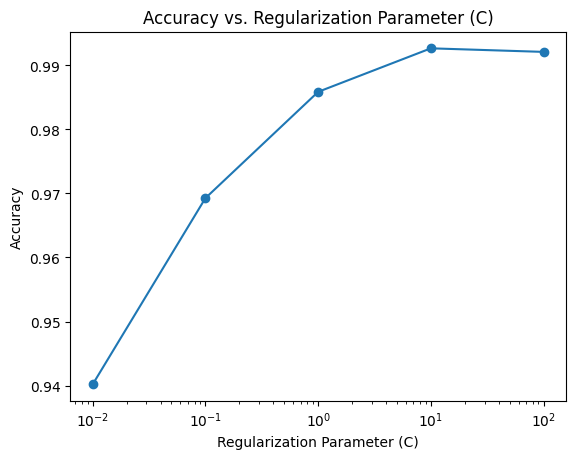

In [13]:
# Implementing logistic regression with different C values (regularization parameter)
C_values = [0.01, 0.1, 1, 10, 100]
accuracies = []  # Start with an empty list

for C in C_values:
    model = LogisticRegression(C =C, solver='lbfgs', max_iter=1000)
    for epoch in range(10):
        model.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)  # Append the accuracy to the list
    
print("C_values:", C_values)
print("Accuracies:", accuracies)
print("Length of C_values:", len(C_values))
print("Length of accuracies:", len(accuracies))

# Plotting the accuracies vs regularization parameter (C)
plt.plot(C_values, accuracies, marker='o')
plt.title('Accuracy vs. Regularization Parameter (C)')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.xscale('log')  # Use log scale for C values
plt.show()
    

Accuracy with 10 trees: 0.9432071269487751
n_estimators_list: [10, 50, 100, 150]
Accuracies: [0.9432071269487751]
Length of n_estimators_list: 4
Length of accuracies: 1
Accuracy with 50 trees: 0.9795100222717149
n_estimators_list: [10, 50, 100, 150]
Accuracies: [0.9432071269487751, 0.9795100222717149]
Length of n_estimators_list: 4
Length of accuracies: 2
Accuracy with 100 trees: 0.9741648106904232
n_estimators_list: [10, 50, 100, 150]
Accuracies: [0.9432071269487751, 0.9795100222717149, 0.9741648106904232]
Length of n_estimators_list: 4
Length of accuracies: 3
Accuracy with 150 trees: 0.9755011135857461
n_estimators_list: [10, 50, 100, 150]
Accuracies: [0.9432071269487751, 0.9795100222717149, 0.9741648106904232, 0.9755011135857461]
Length of n_estimators_list: 4
Length of accuracies: 4


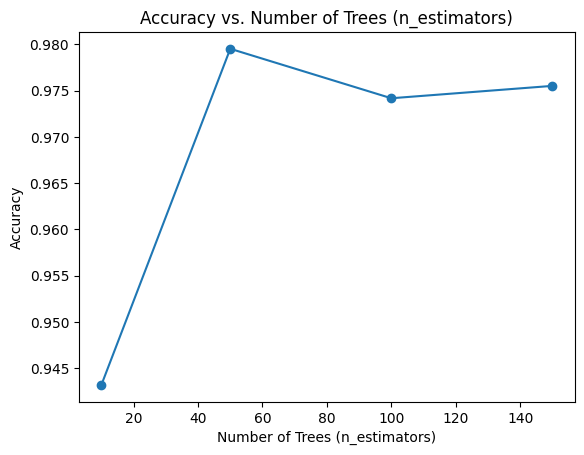

In [14]:
# Implementing Random Forest with different n_estimators (trees)
n_estimators_list = [10, 50, 100, 150]
accuracies = []  # Ensure accuracies is initialized as an empty list

# Loop through different values of n_estimators
for n_estimators in n_estimators_list:
    # Define the model with different n_estimators
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=10, random_state=42)
    
    # Fit the model
    for epoch in range(10):
        model.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)  # Append the accuracy to the list
    print(f'Accuracy with {n_estimators} trees: {accuracy}')
    
    # Check lengths before plotting
    print(f"n_estimators_list: {n_estimators_list}")
    print(f"Accuracies: {accuracies}")
    print(f"Length of n_estimators_list: {len(n_estimators_list)}")
    print(f"Length of accuracies: {len(accuracies)}")
    
    
    # Plotting the accuracies vs n_estimators
if len(n_estimators_list) == len(accuracies):  # Ensure the dimensions match
    plt.plot(n_estimators_list, accuracies, marker='o')
    plt.title('Accuracy vs. Number of Trees (n_estimators)')
    plt.xlabel('Number of Trees (n_estimators)')
    plt.ylabel('Accuracy')
    plt.show()
else:
    print("Error: Lengths of n_estimators_list and accuracies do not match.")
    
    

Accuracy with max_depth=2: 0.9939866369710467
Accuracy with max_depth=3: 0.9953229398663697
Accuracy with max_depth=5: 0.9953229398663697
Accuracy with max_depth=10: 0.9957683741648107
Accuracy with max_depth=20: 0.9957683741648107


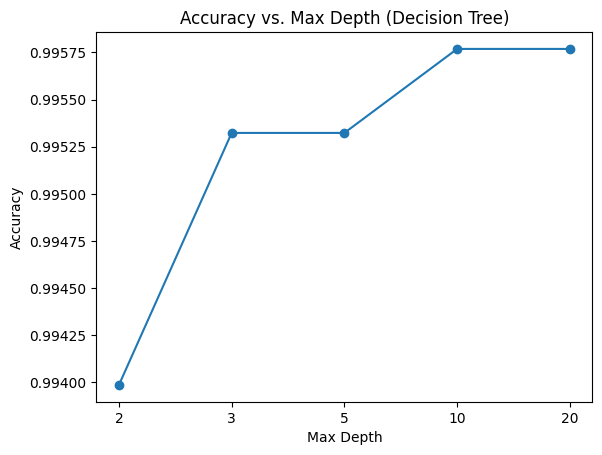

In [15]:
# Implementing Decision Tree with different  parameters for experimentation
max_depth_list = [2, 3, 5, 10, 20]  # Experiment with different max depths
accuracies = []

# Loop through different max_depth values to simulate "epochs" or varying parameters
for max_depth in max_depth_list:
    # Define the model with different max_depth values
    model = DecisionTreeClassifier(max_depth=max_depth, criterion='gini', random_state=42)
    
    # Fit the model
    for epoch in range(10):
        model.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy with max_depth={max_depth}: {accuracy}')

# Plotting the accuracies vs max_depth
max_depth_labels = ['2', '3', '5', '10', '20']
plt.plot(max_depth_labels, accuracies, marker='o')
plt.title('Accuracy vs. Max Depth (Decision Tree)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

Accuracy with alpha=0.1: 0.9418708240534521
Accuracy with alpha=0.5: 0.9379732739420935
Accuracy with alpha=1.0: 0.9364142538975501
Accuracy with alpha=2.0: 0.9346325167037862
Accuracy with alpha=5.0: 0.9332962138084633


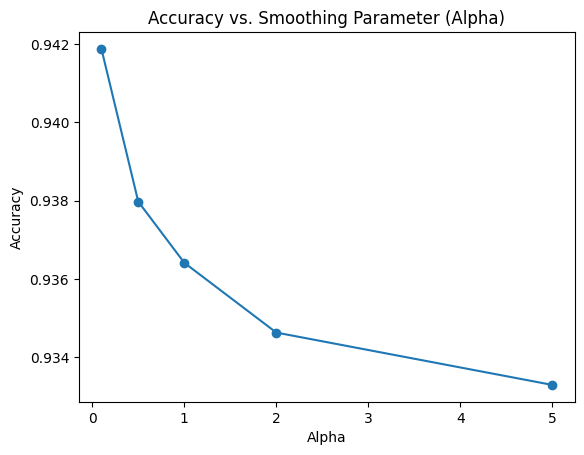

In [16]:
# Implementation Naive Bayes with different parameter values for alpha (smoothing parameter)
alpha_values = [0.1, 0.5, 1.0, 2.0, 5.0]
accuracies = []

# Loop through different alpha values to simulate "epochs" or parameter tuning
for alpha in alpha_values:
    # Define the model with different alpha values
    model = MultinomialNB(alpha=alpha)
    
    # Fit the model
    for epoch in range(10):
        model.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy with alpha={alpha}: {accuracy}')

# Plotting the accuracies vs alpha values
plt.plot(alpha_values, accuracies, marker='o')
plt.title('Accuracy vs. Smoothing Parameter (Alpha)')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.show()

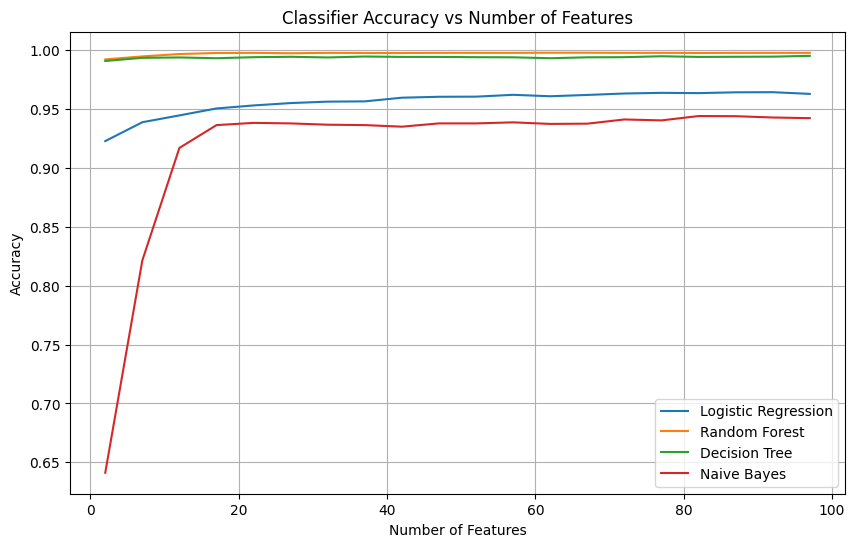

In [17]:
from sklearn.feature_selection import SelectKBest, chi2
# Classifiers to test
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': MultinomialNB()
}

# Number of features to test (you can modify this as per your dataset)
num_features = np.arange(2, 100, 5)
results = {
    classifier: []
    for classifier in classifiers
}

# Perform feature selection and model evaluation
for k in num_features:
    selector = SelectKBest(chi2, k=k)
    x_train_kbest = selector.fit_transform(x_train, y_train)
    x_test_kbest = selector.transform(x_test)
    
    for name, classifier in classifiers.items():
        model = classifier.fit(x_train_kbest, y_train)
        y_pred = model.predict(x_test_kbest)
        acc = accuracy_score(y_test, y_pred)
        results[name].append(acc)

# Plotting the results
plt.figure(figsize=(10, 6))
for name, acc in results.items():
    plt.plot(num_features, acc, label=name)

plt.title('Classifier Accuracy vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
model_LR = LogisticRegression()
model_RFC = RandomForestClassifier()
model_DTC = DecisionTreeClassifier()
model_MNB = MultinomialNB()

In [28]:
models = {
    "Logistic Regression": model_LR,
    "RandomForestClassifier": model_RFC,
    "DecisionTreeClassifier": model_DTC,
    "MultinomialNB": model_MNB
}


for model_name, model in models.items():
    model.fit(x_train, y_train)
    joblib.dump(model, f'saved_models/{model_name}.joblib')
    print(f"Model saved: {model_name}")

Model saved: Logistic Regression
Model saved: RandomForestClassifier
Model saved: DecisionTreeClassifier
Model saved: MultinomialNB


In [20]:
def output_label(n):
   return "Fake News" if n == 0 else "Real News"

In [ ]:
def manual_testing(news):
    news = [news]
    new_def_test = pd.DataFrame({'title': news})
    new_xv_test = vectorization.transform(new_def_test['title'])

    # Ensure that all models are fitted before predictions
    if not hasattr(models['Logistic Regression'], 'C_values'):
        print("Fitting Logistic Regression model...")
        models['Logistic Regression'].fit(x_train, y_train)
    
    if not hasattr(models['RandomForestClassifier'], 'n_estimators_list_'):
        print("Fitting RandomForestClassifier model...")
        models['RandomForestClassifier'].fit(x_train, y_train)

    if not hasattr(models['DecisionTreeClassifier'], 'max_depth_list_'):
        print("Fitting DecisionTreeClassifier model...")
        models['DecisionTreeClassifier'].fit(x_train, y_train)

    if not hasattr(models['MultinomialNB'], 'alpha_values'):
        print("Fitting MultinomialNB model...")
        models['MultinomialNB'].fit(x_train, y_train)
    
    # Predictions from all models
    pred_LR = models['Logistic Regression'].predict(new_xv_test)
    pred_RFC = models['RandomForestClassifier'].predict(new_xv_test)
    pred_DTC = models['DecisionTreeClassifier'].predict(new_xv_test)
    pred_MNB = models['MultinomialNB'].predict(new_xv_test)

    # Output for each model
    # return f"LR: {output_label(pred_LR[0])}, RFC: {output_label(pred_RFC[0])}, DTC: {output_label(pred_DTC[0])}, MNB: {output_label(pred_MNB[0])}"
    return {"LR": output_label(pred_LR[0]), "RFC": output_label(pred_RFC[0]), "DTC": output_label(pred_DTC[0]), "MNB": output_label(pred_MNB[0])}

In [22]:
news = str("WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€")
print(manual_testing(news))

Fitting Logistic Regression model...
Fitting RandomForestClassifier model...
Fitting DecisionTreeClassifier model...
Fitting MultinomialNB model...
{'LR': 'Real News', 'RFC': 'Real News', 'DTC': 'Real News', 'MNB': 'Real News'}


In [23]:
news = str("Drunk Bragging Trump Staffer Started Russian Collusion Investigation")
print(manual_testing(news))

Fitting Logistic Regression model...
Fitting RandomForestClassifier model...
Fitting DecisionTreeClassifier model...
Fitting MultinomialNB model...
{'LR': 'Fake News', 'RFC': 'Fake News', 'DTC': 'Fake News', 'MNB': 'Fake News'}


In [24]:
news = str("Hello how are you")
print(manual_testing(news))

Fitting Logistic Regression model...
Fitting RandomForestClassifier model...
Fitting DecisionTreeClassifier model...
Fitting MultinomialNB model...
{'LR': 'Fake News', 'RFC': 'Fake News', 'DTC': 'Fake News', 'MNB': 'Fake News'}


In [25]:
%%capture
pip install streamlit

In [26]:
import streamlit as st

# App title
st.title("Fake News Detector")

# Input text area
st.write("Enter the news text below:")
input_text = st.text_area("News Text", placeholder="Type or paste the news article here...", height=200)

# Prediction button
if st.button("Predict"):
    # You can replace this with the model's prediction later
    st.write("Prediction result will appear here after backend integration.")
    st.warning("Backend model integration needed for predictions.")



2024-12-01 11:14:15.087 
  command:

    streamlit run C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
